### Question 1

In [5]:
import numpy as np
import pandas as pd
from os.path import exists
from scipy.stats import norm, binom, beta
from warnings import warn
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
# read files
df2011 = pd.read_sas("C:/Users/fengy/Desktop/stats 507/hw2/DEMO2011-2012.XPT")
# add columns to a single dataframe
df2011['year'] = "2011-2012"
# read file and import it as df
df2013 = pd.read_sas("C:/Users/fengy/Desktop/stats 507/hw2/DEMO2013-2014.XPT")
# add columns to a single dataframe
df2013['year'] = "2013-2014"
# read file and import it as df
df2015 = pd.read_sas("C:/Users/fengy/Desktop/stats 507/hw2/DEMO2015-2016.XPT")
# add columns to a single dataframe
df2015['year'] = "2015-2016"
# read file and import it as df
df2017 = pd.read_sas("C:/Users/fengy/Desktop/stats 507/hw2/DEMO2017-2018.XPT")
# add columns to a single dataframe
df2017['year'] = "2017-2018"
# merge seperate dataframes into one
mergedf = pd.concat([df2011, df2013,df2015,df2017])
# select columns from a dataframe
mydf = pd.DataFrame(mergedf[["SEQN","RIDAGEYR","RIAGENDR","RIDRETH3","DMDEDUC2","DMDMARTL",
                  "RIDSTATR", "SDMVPSU", "SDMVSTRA", "WTMEC2YR", "WTINT2YR","year"]])
# change the column name
mydf = mydf.rename({'SEQN': 'id',
                    'RIDAGEYR': 'age',
                    'RIAGENDR': 'gender',
                    'RIDRETH3': 'race',
                    'DMDEDUC2': 'education',
                    'DMDMARTL': 'marital_status',
                    'RIDSTATR': 'exam_status',
                    'SDMVPSU': 'psu',
                    'SDMVSTRA': 'strata',
                    'WTMEC2YR': 'exam_wt',
                    'WTINT2YR': 'interview_wt'}, axis='columns')
demo_cols = {
    'SEQN': 'id',
    'RIDAGEYR': 'age',
    'RIAGENDR': 'gender',
    'RIDRETH3': 'race',
    'DMDEDUC2': 'education',
    'DMDMARTL': 'marital_status',
    'RIDSTATR': 'exam_status',
    'SDMVPSU': 'psu',
    'SDMVSTRA': 'strata',
    'WTMEC2YR': 'exam_wt',
    'WTINT2YR': 'interview_wt'
}
demo_int = ('id', 'age', 'psu', 'strata')

### verify the categorical variable
demo_cat = {
    'gender': {1: 'Male', 2: 'Female'},
    'race': {1: 'Mexican American',
             2: 'Other Hispanic',
             3: 'Non-Hispanic White',
             4: 'Non-Hispanic Black',
             6: 'Non-Hispanic Asian',
             7: 'Other/Multiracial'
             },
    'education': {1: 'Less than 9th grade',
                  2: '9-11th grade (Includes 12th grade with no diploma)',
                  3: 'High school graduate/GED or equivalent',
                  4: 'Some college or AA degree',
                  5: 'College graduate or above',
                  7: 'Refused',
                  9: "Don't know"
                  },
    'marital_status': {1: 'Married',
                       2: 'Widowed',
                       3: 'Divorced',
                       4: 'Separated',
                       5: 'Never married',
                       6: 'Living with partner',
                       77: 'Refused',
                       99: "Don't know"
                       },
    'exam_status': {1: 'Interviewed only',
                    2: 'Both interviewed and MEC examined'
                    }
 }

# replace categorical variables to new dataframe
for col, d in demo_cat.items():
    mydf[col] = pd.Categorical(mydf[col].replace(d))

# replace integer variables in the new dataframe
for col in demo_int:
    mydf[col] = pd.to_numeric(mydf[col], downcast='integer')
#to save the dataframe, mydf to a pkl file
mydf.to_pickle('C:/Users/fengy/Desktop/stats 507/hw4/mydf.pkl')
#to load mydf back to the dataframe df
mydf = pd.read_pickle('C:/Users/fengy/Desktop/stats 507/hw4/mydf.pkl') 
    
    

# dealling data within new ohx dataframe
ohx = pd.read_csv("C:/Users/fengy/Desktop/stats 507/hw4/ohx.csv")
#to save the dataframe, ohx to a pkl file
ohx.to_pickle('C:/Users/fengy/Desktop/stats 507/hw4/ohx.pkl')  
#to load ohx.pkl back to the dataframe df
ohx = pd.read_pickle('C:/Users/fengy/Desktop/stats 507/hw4/ohx.pkl') 
df2 = ohx.drop([ohx.columns[0]], axis='columns')
df2 = df2[["id","dentition_status"]]

# merge two dataframe into one and prepare for creating new variables
result = pd.merge(left=mydf, right = df2, left_on='id', right_on='id')

# create new varible -- college according to certain standard.
result["college"] = (result["education"] == "Some college or AA degree")
result['college'] = result['college'].map(
                   {True: "some college/college graduate",False: "No college/<20"})
a  = result[["id","gender","age","college","exam_status","dentition_status"]]

# create a new varible -- complete according to certain standard.
conditions = [
    (a['exam_status'] == 'Both interviewed and MEC examined') & 
    (a['dentition_status'] == 'Complete'),
    (a['exam_status'] == 'Interviewed only')| 
    (a['dentition_status'] == 'Partial')|(a['dentition_status'] == 'Not Done')]
choices = ['complete',"missing"]
a['complete'] = np.select(conditions, choices)

conditions1 = [(a["age"] < 20),(a["age"] >= 20)]
choices1 = ["under20","above20"]
a['under_20'] = np.select(conditions1, choices1)
mydf3 = mydf[mydf.exam_status != "Both interviewed and MEC examined"]

# calculate removing rows
print(mydf3.shape[0])

# calculate the rest rows
print(a.shape[0]-mydf3.shape[0])



## figure out the the relative value which relates to college level with respective to different complete status
s1 = a.groupby(['college']).complete.value_counts()
s1 = s1.unstack()
s1_1 = a.groupby(['college']).complete.value_counts("Normalize")
s1_1 = s1_1.unstack() 
s1_2 = pd.concat([s1,s1_1],axis = 1 )

## figure out the the relative value which relates to gender level with respective to different complete status
s2 = a.groupby(['gender']).complete.value_counts()
s2 = s2.unstack()
s2_1 = a.groupby(['gender']).complete.value_counts("Normalize")
s2_1 = s2_1.unstack() 
s2_2 = pd.concat([s2,s2_1],axis = 1 )

## figure out the the relative value which relates to age level with respective to different complete status
s3 = a.groupby(['under_20']).complete.value_counts()
s3 = s3.unstack()
s3_1 = a.groupby(['under_20']).complete.value_counts("Normalize")
s3_1 = s3_1.unstack() 
s3_2 = pd.concat([s3,s3_1],axis = 1 )
# calculate the mean and standrd deviation of variable age.
s5 = pd.DataFrame(a.groupby(["complete"]).age.mean())
s5 = s5.transpose()
s6 = pd.DataFrame(a.groupby(["complete"]).age.std())
s6 = s6.transpose()
inter_table = pd.concat([s5,s6])
final_table = pd.concat([s2_2, s1_2, s3_2])
display(final_table)
display(inter_table)

1757
34152


<ipython-input-12-241b7127006e>:120: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['complete'] = np.select(conditions, choices)
<ipython-input-12-241b7127006e>:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['under_20'] = np.select(conditions1, choices1)


complete,complete,missing,complete,missing
Female,17342,876,0.951916,0.048084
Male,17018,673,0.961958,0.038042
No college/<20,28077,1198,0.959078,0.040922
some college/college graduate,6283,351,0.947091,0.052909
above20,20369,1277,0.941005,0.058995
under20,13991,272,0.980930,0.019070


complete,complete,missing
age,33.169470,43.180762
age,24.367362,21.736997


### Question2

## part a

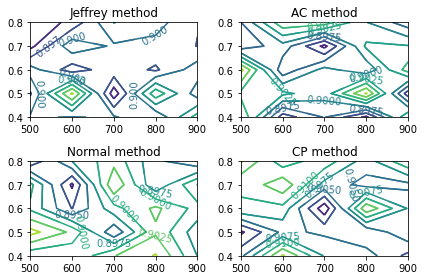

In [7]:
def ci_prop(
    x,
    level=0.95,
    method="Normal",
):

# check input type
    try:
        x = np.asarray(x)  # or np.array() as instructed.
    except TypeError:
        print("Could not convert x to type ndarray.")

    # check that x is bool or 0/1
    if x.dtype is np.dtype('bool'):
        pass
    elif not np.logical_or(x == 0, x == 1).all():
        raise TypeError("x should be dtype('bool') or all 0's and 1's.")

    # check method
    assert method in ["Normal", "CP", "Jeffrey", "AC"]

    # determine the length
    n = x.size

    # compute estimate
    if method == 'AC':
        z = norm.ppf(1 - (1 - level) / 2)
        n = (n + z ** 2)
        est = (np.sum(x) + z ** 2 / 2) / n
    else:
        est = np.mean(x)

    # warn for small sample size with "Normal" method
    if method == 'Normal' and (n * min(est, 1 - est)) < 12:
        warn(Warning(
            "Normal approximation may be incorrect for n * min(p, 1-p) < 12."
        ))

    # compute bounds for Normal and AC methods
    if method in ['Normal', 'AC']:
        se = np.sqrt(est * (1 - est) / n)
        z = norm.ppf(1 - (1 - level) / 2)
        lwr, upr = est - z * se, est + z * se

    # compute bounds for CP method
    if method == 'CP':
        alpha = 1 - level
        s = np.sum(x)
        lwr = beta.ppf(alpha / 2, s, n - s + 1)
        upr = beta.ppf(1 - alpha / 2, s + 1, n - s)

    # compute bounds for Jeffrey method
    if method == 'Jeffrey':
        alpha = 1 - level
        s = np.sum(x)
        lwr = beta.ppf(alpha / 2, s + 0.5, n - s + 0.5)
        upr = beta.ppf(1 - alpha / 2, s + 0.5, n - s + 0.5)

    # prepare return values
    out = {"mean": est, "level": 100 * level, "lwr": lwr, "upr": upr}
    return out



n = np.arange(500,1000,100)


p = np.arange(0.4, 0.9, 0.1)

## calculate the minimum replicate times for monte carlo simulation
z = norm.ppf(.95)
replicate = round(z*z*0.9*0.1*40000)

# create certain empty matrix to store the value from the loop
size = 5
montecarlop = np.zeros(shape=(size,size))
count = np.zeros(shape=(size,size))
result = {}
width = np.zeros(shape=(size,size))

### use monte carlo simulation to find the probability and relative confidence interval using jeffrey method
for j in range(0, size):
    for k in range(0,size):
        for i in range(0,replicate):
            result[i] = ci_prop(np.random.binomial(1, p[j], n[k]), level = 0.9, method = "Jeffrey")    
            if result[i].get("lwr")<= p[j] <= result[i].get("upr"): 
                count[j,k] = count[j,k] + 1
                width[j,k] = result[i].get("upr")-result[i].get("lwr")
        montecarlop[j,k] = count[j,k]/replicate 
# save the output as dataframe        
montecarlop = pd.DataFrame(montecarlop)
width = pd.DataFrame(width)


# create certain empty matrix to store the value from the loop
montecarlop1 = np.zeros(shape=(size,size))
count1 = np.zeros(shape=(size,size))
result1 = {}
width1 = np.zeros(shape=(size,size))

### use monte carlo simulation to find the probability and relative confidence interval using Normal method
for j in range(0, size):
    for k in range(0,size):
        for i in range(0,replicate):
            result1[i] = ci_prop(np.random.binomial(1, p[j], n[k]), level = 0.9, method = "Normal")    
            if result1[i].get("lwr")<= p[j] <= result1[i].get("upr"): 
                count1[j,k] = count1[j,k] + 1
                width1[j,k] = result1[i].get("upr")-result1[i].get("lwr")
        montecarlop1[j,k] = count1[j,k]/replicate
# save outputs as dataframe
montecarlop1 = pd.DataFrame(montecarlop1)
width1 = pd.DataFrame(width1)



# create certain empty matrix to store the value from the loop
montecarlop2 = np.zeros(shape=(size,size))
count2 = np.zeros(shape=(size,size))
width2 = np.zeros(shape=(size,size))
result2 = {}
### use monte carlo simulation to find the probability and relative confidence interval using AC method
for j in range(0, size):
    for k in range(0,size):
        for i in range(0,replicate):
            result2[i] = ci_prop(np.random.binomial(1, p[j], n[k]), level = 0.9, method = "AC")    
            if result2[i].get("lwr")<= p[j] <= result2[i].get("upr"):                 
                count2[j,k] = count2[j,k] + 1
                width2[j,k] = result2[i].get("upr")-result2[i].get("lwr")
        montecarlop2[j,k] = count2[j,k]/replicate
montecarlop2 = pd.DataFrame(montecarlop2)
width2 = pd.DataFrame(width2)
montecarlop3 = np.zeros(shape=(size,size))
count3 = np.zeros(shape=(size,size))
width3 = np.zeros(shape=(size,size))
result3 = {}
### use monte carlo simulation to find the probability and relative confidence interval using CP method
for j in range(0, size):
    for k in range(0,size):
        for i in range(0,replicate):
            result3[i] = ci_prop(np.random.binomial(1, p[j], n[k]), level = 0.9, method = "CP")    
            if result3[i].get("lwr")<= p[j] <= result3[i].get("upr"): 
                count3[j,k] = count3[j,k] + 1
                width3[j,k] = result3[i].get("upr")-result3[i].get("lwr")
        montecarlop3[j,k] = count3[j,k]/replicate
# save outputs as dataframe
montecarlop3 = pd.DataFrame(montecarlop3)
width3 = pd.DataFrame(width3)


## coutur plot relative to probability by using subplot
fig4, axs4 = plt.subplots(2, 2)
axs4[0, 0].contour(n, p, montecarlop)
axs4[0, 0].clabel(axs4[0, 0].contour(n, p, montecarlop), inline=True, fontsize=10)
axs4[0, 0].set_title('Jeffrey method')

axs4[1, 0].contour(n, p, montecarlop1)
axs4[1, 0].clabel(axs4[1, 0].contour(n, p, montecarlop1), inline=True, fontsize=10)
axs4[1, 0].set_title('Normal method')

axs4[0, 1].contour(n, p, montecarlop2)
axs4[0, 1].clabel(axs4[0, 1].contour(n, p, montecarlop2), inline=True, fontsize=10)
axs4[0, 1].set_title('AC method')

axs4[1, 1].contour(n, p, montecarlop3)
axs4[1, 1].clabel(axs4[1, 1].contour(n, p, montecarlop3), inline=True, fontsize=10)
axs4[1, 1].set_title('CP method')
fig4.tight_layout()

## Part b

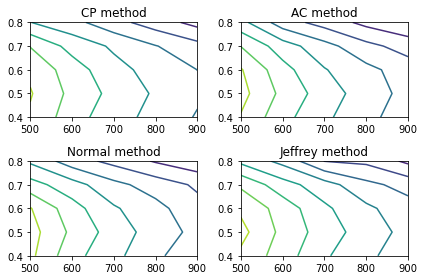

In [8]:

## coutur plot relative to confidence interval by using subplot
fig2, axs2 = plt.subplots(2, 2)
axs2[0, 0].contour(n, p, width3)
axs2[0, 0].clabel(axs4[0, 0].contour(n, p, width3), inline=True, fontsize=10)
axs2[0, 0].set_title('CP method')

axs2[1, 0].contour(n, p, width1)
axs2[1, 0].clabel(axs4[1, 0].contour(n, p, width1), inline=True, fontsize=10)
axs2[1, 0].set_title('Normal method')

axs2[0, 1].contour(n, p, width2)
axs2[0, 1].clabel(axs4[0, 1].contour(n, p, width2), inline=True, fontsize=10)
axs2[0, 1].set_title('AC method')

axs2[1, 1].contour(n, p, width)
axs2[1, 1].clabel(axs4[1, 1].contour(n, p, width), inline=True, fontsize=10)
axs2[1, 1].set_title('Jeffrey method')
fig2.tight_layout()